In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npy

import os 

os.getcwd()


'C:\\Users\\User'

In [2]:
df = pd.read_csv('globalwaste.csv')

In [3]:
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [4]:
print("Rows, Columns" ,df.shape)

print(df.dtypes)

Rows, Columns (165, 6)
Country                    object
Total_Plastic_Waste_MT    float64
Main_Sources               object
Recycling_Rate            float64
Per_Capita_Waste_KG       float64
Coastal_Waste_Risk         object
dtype: object


In [81]:
print('Null Values:')
print(df.isnull().sum())

Null Values:
Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
Continents                0
dtype: int64


In [97]:
total_waste = df["Total_Plastic_Waste_MT"].sum()

print(f"Total waste: {total_waste:,.2f}metric tons")


Total waste: 284.38metric tons


In [99]:
top_producing_countries = df.sort_values(by='Total_Plastic_Waste_MT',ascending=False)[['Country','Total_Plastic_Waste_MT']].head(10)
top_producing_countries

,Country,Total_Plastic_Waste_MT
0,China,59.08
1,United States,42.02
2,India,26.33
3,Japan,7.99
4,Germany,6.28
5,Brazil,5.96
6,Indonesia,5.85
7,Russia,5.84
8,United Kingdom,5.03
9,France,4.98


In [7]:
top_10_polluting_per_capita = df.sort_values(by='Per_Capita_Waste_KG',ascending=False)[['Country','Per_Capita_Waste_KG']].head(10)
top_10_polluting_per_capita

,Country,Per_Capita_Waste_KG
79,Iceland,1564.4
78,Malta,1331.5
76,Montenegro,1004.8
77,Luxembourg,957.8
164,Nauru,927.8
163,Tuvalu,833.3
72,Estonia,534.6
75,Cyprus,531.1
74,Trinidad and Tobago,478.6
162,Palau,437.2


In [8]:
top_10_recycle_countries = df.sort_values(by='Recycling_Rate',ascending=False)[['Country','Recycling_Rate']].head(10)
top_10_recycle_countries

,Country,Recycling_Rate
3,Japan,84.8
44,Singapore,59.8
14,South Korea,59.1
33,Austria,56.4
4,Germany,56.1
22,Netherlands,55.9
79,Iceland,55.6
32,Sweden,50.6
77,Luxembourg,48.9
8,United Kingdom,46.2


In [9]:
from countryinfo import CountryInfo 

In [10]:
continents = []
for i in df['Country']:
    try:
        info = CountryInfo(i)
        continent = info.region()
    except KeyError:
        continent = None
    continents.append(continent)    
df['Continents'] = continents
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
0,China,59.08,Packaging_Industrial,29.8,41.2,High,Asia
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium,Americas
2,India,26.33,Consumer_Goods,11.5,19.3,High,Asia
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium,Asia
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low,Europe


In [11]:
df.head(3)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
0,China,59.08,Packaging_Industrial,29.8,41.2,High,Asia
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium,Americas
2,India,26.33,Consumer_Goods,11.5,19.3,High,Asia


In [12]:
# let's check countries that didnt automaticall generate continent values
df.query("Continents.isnull()")

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
76,Montenegro,0.63,Consumer_Packaging,3.4,1004.8,Medium,None
82,Myanmar,0.51,Consumer_Packaging,2.1,9.3,High,None
106,Eswatini,0.03,Consumer_Packaging,1.2,25.6,Low,None
112,Sao Tome and Principe,0.01,Consumer_Packaging,0.8,45.2,High,None
128,Republic of Congo,0.08,Consumer_Packaging,0.9,14.2,High,None
129,Democratic Republic of Congo,0.24,Consumer_Packaging,0.4,2.6,Medium,None
133,Gambia,0.02,Consumer_Packaging,0.5,8.1,High,None
138,North Macedonia,0.29,Consumer_Packaging,17.8,139.2,Low,None
140,Kosovo,0.21,Consumer_Packaging,8.9,115.7,Low,None
161,Micronesia,0.01,Consumer_Packaging,1.5,86.3,High,None


In [13]:
# well fill in the null values with their appropriate continents
df.loc[df['Country'].isin(['Kosovo','North Macedonia','Montenegro']),'Continents'] ='Europe'
df.loc[df['Country'].isin(['Eswatini','Sao Tome and Principe','Republic of Congo','Democratic Republic of Congo','Gambia']),'Continents'] ='Europe'
df.loc[df['Country']=='Myanmar','Continents'] = 'Asia'
df.loc[df['Country']=='Micronesia','Continents']= 'Oceania'

In [14]:
df.query("Continents.isnull()")

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents


In [15]:
# the continent which pollutes the most
df.groupby('Continents').agg({'Total_Plastic_Waste_MT':'sum'}).reset_index().sort_values(by='Total_Plastic_Waste_MT',ascending=False)

,Continents,Total_Plastic_Waste_MT
2,Asia,135.50
1,Americas,69.36
3,Europe,63.22
0,Africa,14.24
4,Oceania,2.06


In [16]:
# the average recycling rates by country
df.groupby('Continents').agg({'Recycling_Rate':'mean'}).reset_index().sort_values('Recycling_Rate',ascending=False)

,Continents,Recycling_Rate
3,Europe,28.118182
2,Asia,12.520930
1,Americas,9.587500
4,Oceania,5.278571
0,Africa,3.291667


In [69]:
# the continent at high risk of coastal polution
df[df['Coastal_Waste_Risk']=='High'].groupby('Continents')['Coastal_Waste_Risk'].count()

Continents
Africa      32
Americas     8
Asia        18
Europe       3
Oceania     13
Name: Coastal_Waste_Risk, dtype: int64

In [71]:
# Identify best performing countries (high recycling rate, low total plastic waste)
best_performers = df[(df['Recycling_Rate'] > 50) & (df['Total_Plastic_Waste_MT'] < df['Total_Plastic_Waste_MT'].mean())]
print("Best Performing Countries (High Recycling Rate, Low Total Plastic Waste):")
print(best_performers[['Country', 'Total_Plastic_Waste_MT', 'Recycling_Rate']])

Best Performing Countries (High Recycling Rate, Low Total Plastic Waste):
      Country  Total_Plastic_Waste_MT  Recycling_Rate
32     Sweden                    1.51            50.6
33    Austria                    1.48            56.4
44  Singapore                    1.27            59.8
79    Iceland                    0.57            55.6


In [85]:
# lets view the top 20 plastic generating countries
df.sort_values('Total_Plastic_Waste_MT', ascending = False).head(20)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Continents
0,China,59.08,Packaging_Industrial,29.8,41.2,High,Asia
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium,Americas
2,India,26.33,Consumer_Goods,11.5,19.3,High,Asia
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium,Asia
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low,Europe
5,Brazil,5.96,Consumer_Packaging,1.2,28.1,Medium,Americas
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High,Asia
7,Russia,5.84,Industrial_Consumer,5.6,40.2,Medium,Europe
8,United Kingdom,5.03,Packaging_Consumer,46.2,74.3,Low,Europe
9,France,4.98,Packaging_Consumer,27.3,73.1,Low,Europe


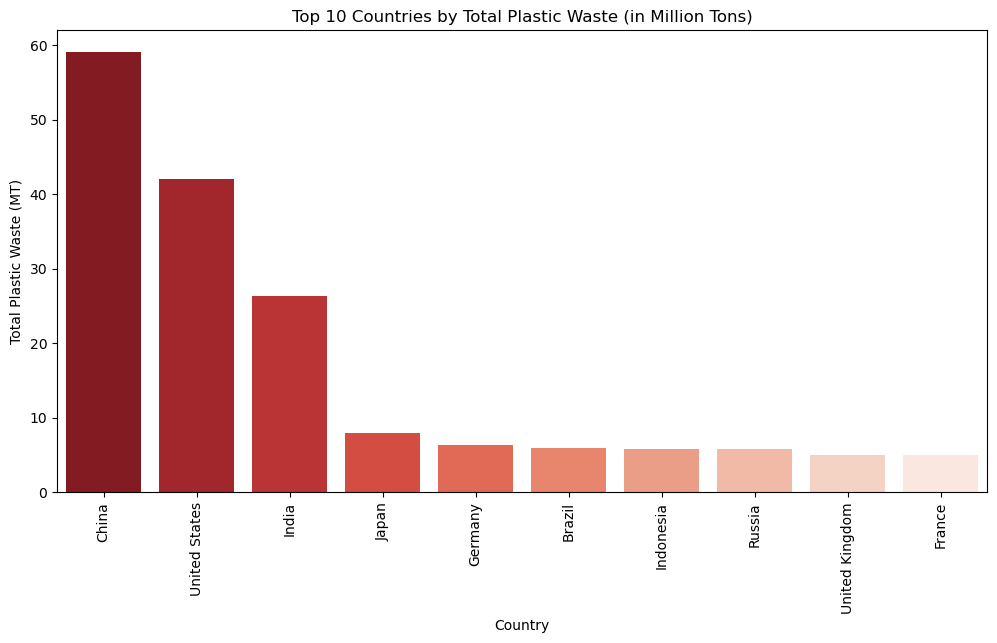

In [18]:
# lets find the top 10 countries by total plastic waste

top_10 = df.nlargest(10, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')

plt.title('Top 10 Countries by Total Plastic Waste (in Million Tons)')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.show()

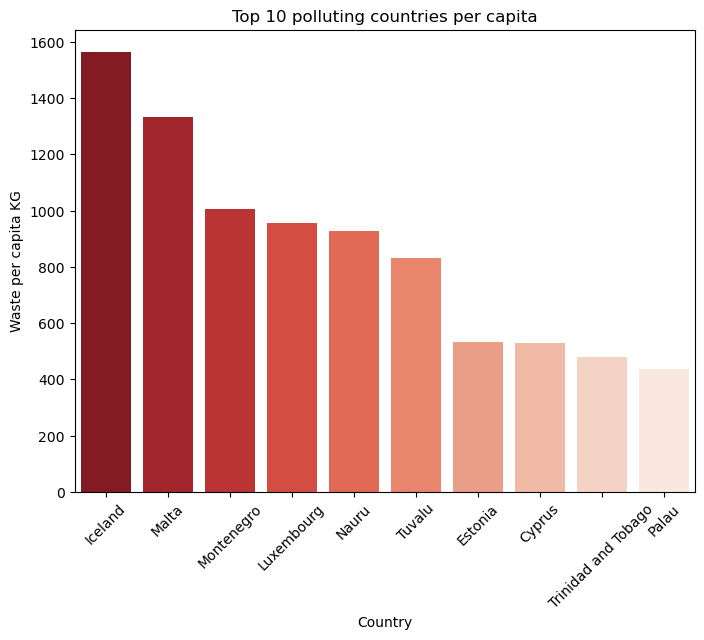

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_10_polluting_per_capita,x='Country',y='Per_Capita_Waste_KG', palette='Reds_r')
plt.xlabel('Country')
plt.ylabel('Waste per capita KG')
plt.title('Top 10 polluting countries per capita')
plt.xticks(rotation=45)
plt.show()

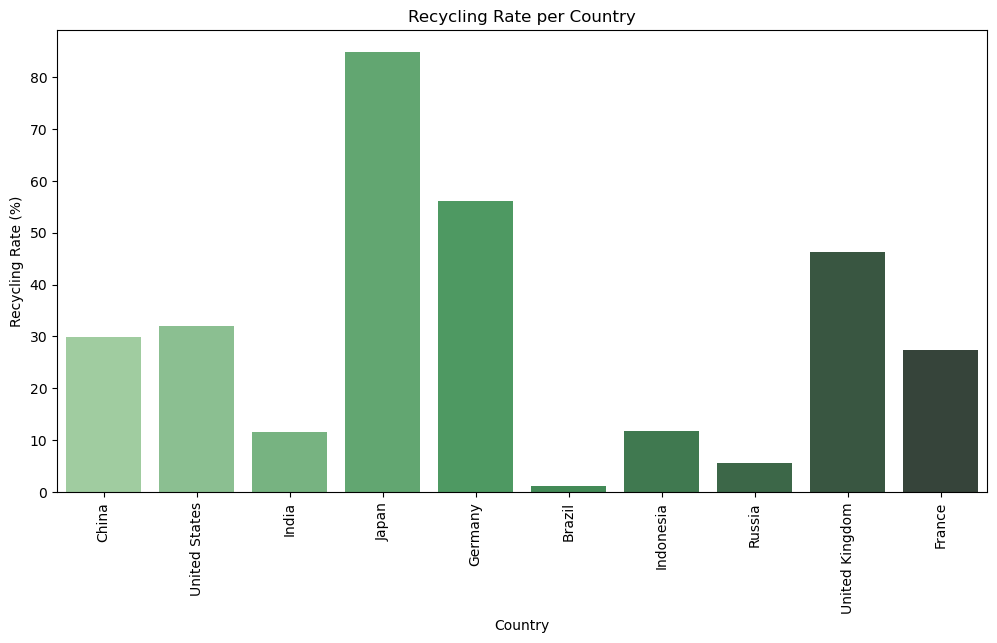

In [20]:
# lets view the recycling rare of the top 20 countries

plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='Country', y='Recycling_Rate', palette='Greens_d')
plt.xticks(rotation=90)
plt.title('Recycling Rate per Country')
plt.ylabel('Recycling Rate (%)')
plt.xlabel('Country')
plt.show()

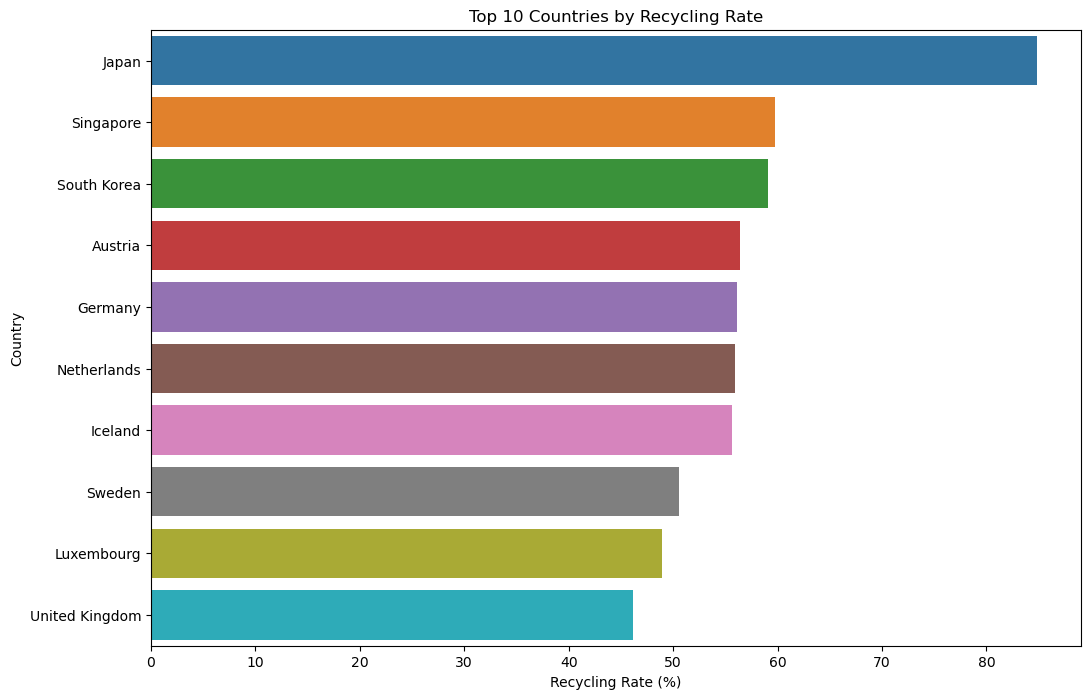

In [21]:
# Plot recycling rates by country
plt.figure(figsize=(12, 8))
sns.barplot(y='Country', x='Recycling_Rate', data=df.sort_values('Recycling_Rate', ascending=False).head(10))
plt.title('Top 10 Countries by Recycling Rate')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Country')
plt.show()


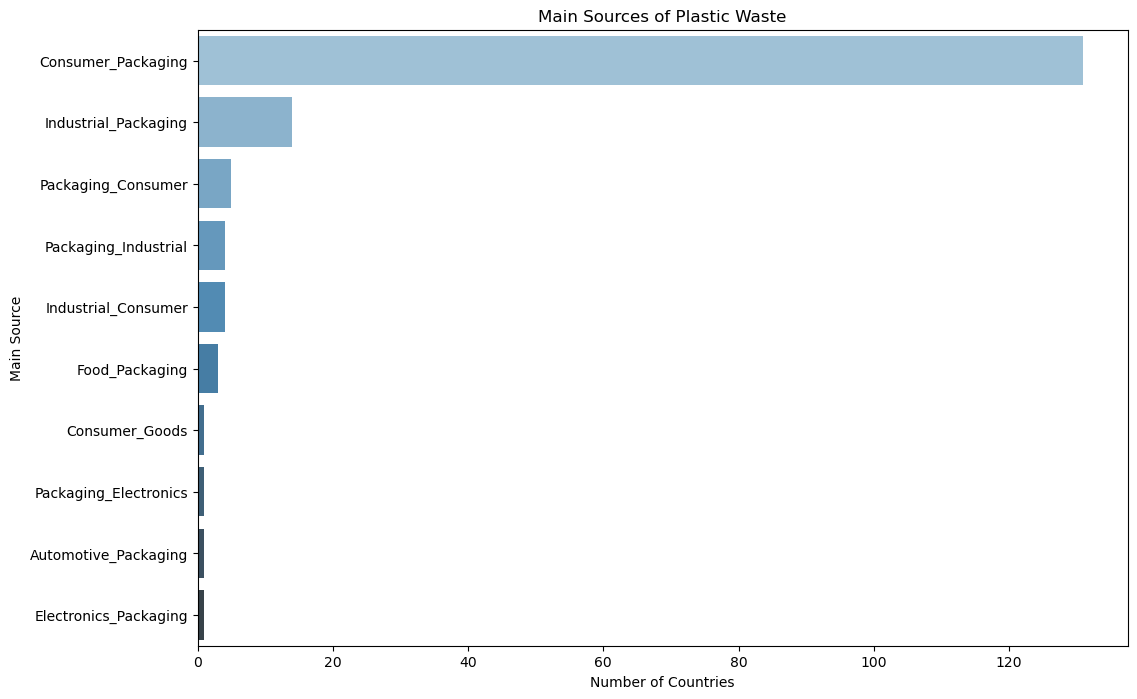

In [73]:
# Count the occurrences of each main source of plastic waste
source_counts = df['Main_Sources'].value_counts()

# Bar chart of main sources
plt.figure(figsize=(12, 8))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='Blues_d')
plt.title('Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Source')
plt.show()

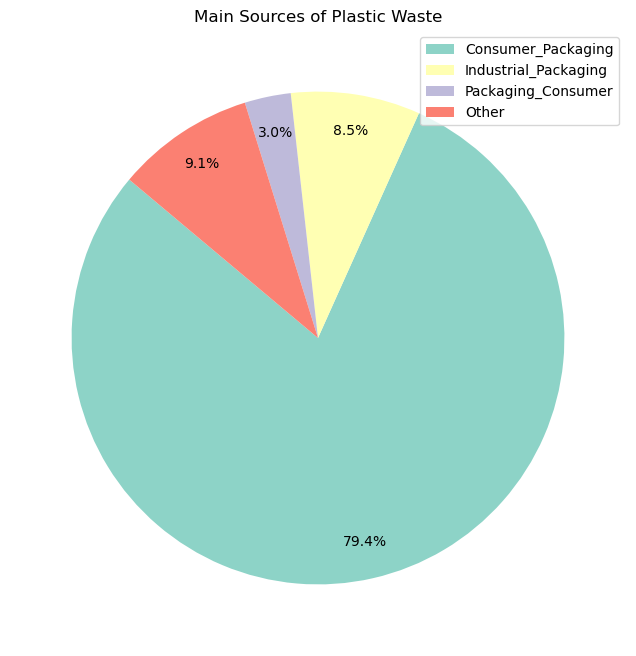

In [22]:
# the main sources of plastic waste
source_counts = df['Main_Sources'].value_counts()
threshold = 5
filtered_sources = source_counts[source_counts >= threshold]
other_sources_sum = source_counts[source_counts < threshold].sum()

filtered_sources['Other'] = other_sources_sum

plt.figure(figsize=(8, 8))
plt.pie(filtered_sources, labels=None, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"), pctdistance=0.85)
plt.legend(labels=filtered_sources.index)
plt.title('Main Sources of Plastic Waste')
plt.show()

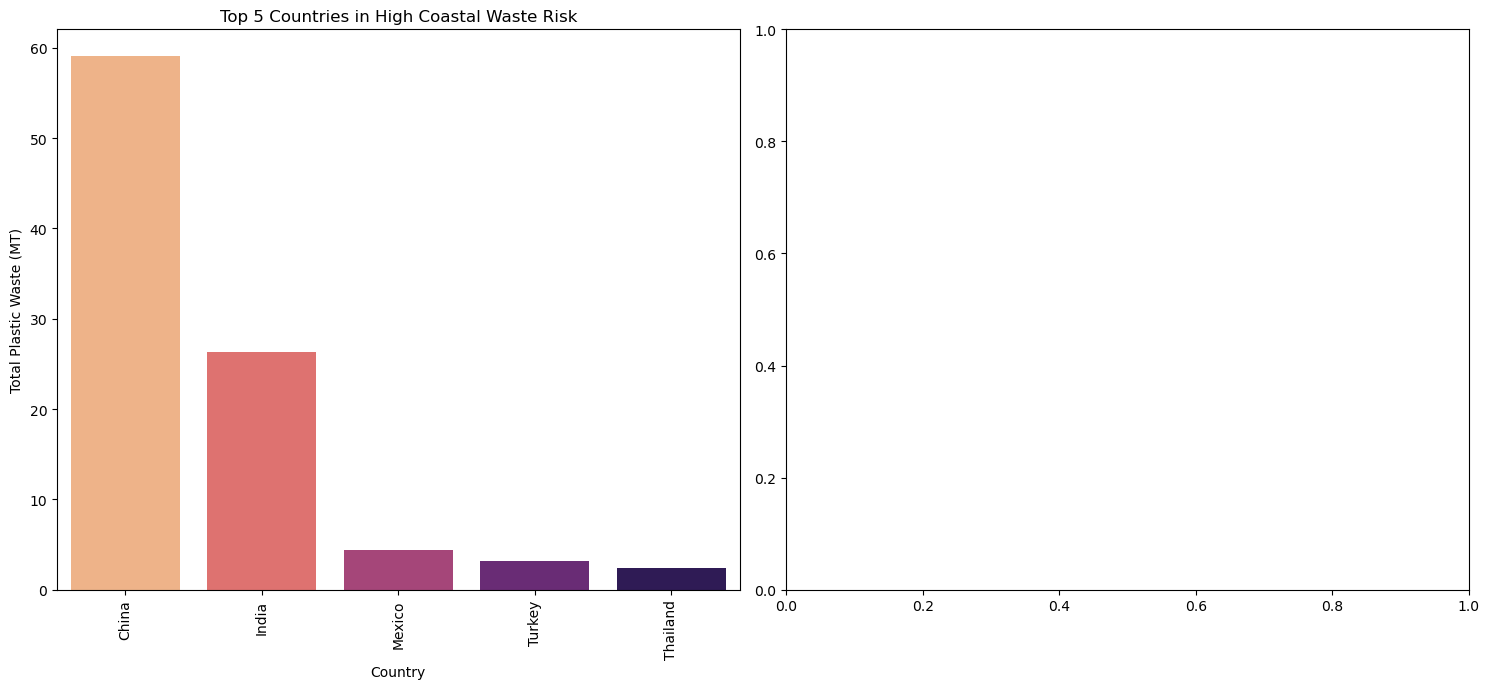

In [23]:
top_5_high_risk = df[df['Coastal_Waste_Risk'] == 'High'].nlargest(5, 'Total_Plastic_Waste_MT')

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# High Risk
sns.barplot(data=top_5_high_risk, x='Country', y='Total_Plastic_Waste_MT', palette='magma_r', ax=axes[0])
axes[0].set_title('Top 5 Countries in High Coastal Waste Risk')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Plastic Waste (MT)')
axes[0].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


<Axes: xlabel='Coastal_Waste_Risk', ylabel='count'>

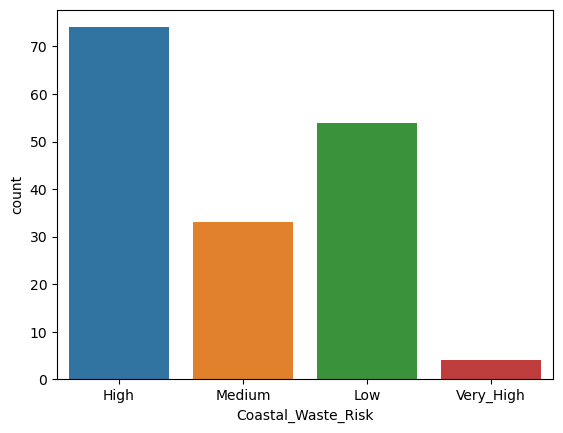

In [24]:
sns.countplot(data = df,x='Coastal_Waste_Risk')

In [79]:
print(dtypes())

NameError: name 'dtypes' is not defined